# <font color = lightcoral>Inference QA for Agents 1, 2 & 3
>    
##### <font color = red> Testing High Precision Model --> 20240712_Transformers_Non_Overlapping_run_143_of_180.pt

**20240715_flask_app_model_change_v1.00.py**

> From transformer models
>

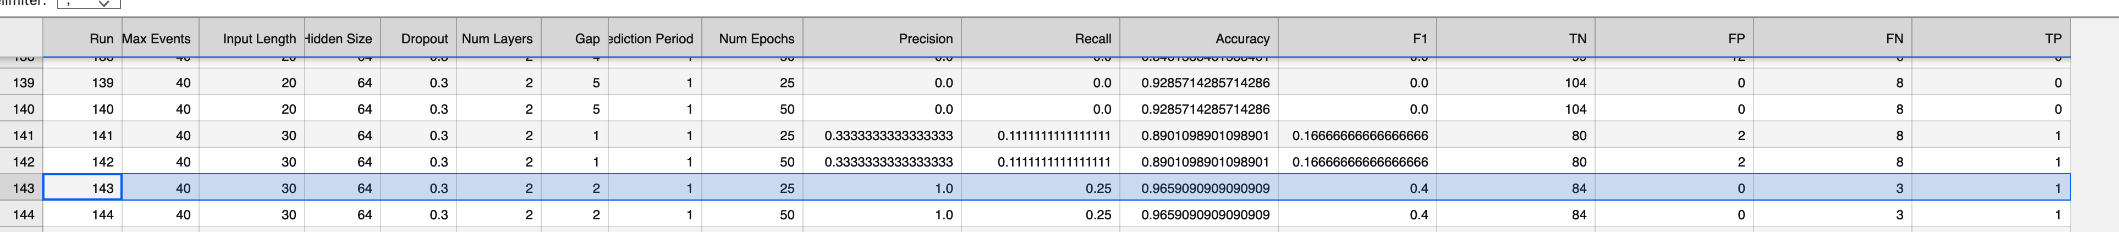

## <font color = grey> Admin

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

import warnings
warnings.simplefilter("ignore")


Base directory set to: /home/sagemaker-user


---

# <font color = lightsteelblue> 5 Key Files

In [2]:
# import pandas as pd
# import numpy as np
# import time

# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'

# # ################################## Part 1: Parsed Raw File ###################################

# # print("\n" + "*"*100)
# # print("********************** Part 1: Parsed Raw File ******************************************")
# # print("*"*100 + "\n")

# # parsed_file =  f"{data_dir}/01.BGL.log_structured.csv"
# # parsed_file_df = pd.read_csv(parsed_file)
# # display(parsed_file_df.head())
# # print("Shape of Parsed Raw File:", parsed_file_df.shape)

# ######################### Part 2: Encoded File with Feature for Model Training ######################

# print("\n" + "*"*100)
# print("********************** Part 2: Input Data with Features ******************************************")
# print("*"*100 + "\n")

# encoded_feature_input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
# encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)
# display(encoded_feature_input_file_df.iloc[:, :25].head())
# print("Shape of Encoded File with Features:", encoded_feature_input_file_df.shape)

# ######################### Part 3: Orig Parquet File with 20 Event Columns (Most and Least used) Only for Mapping ######################

# print("\n" + "*"*100)
# print("********************** Part 3:  Orig Parquet File with 20 Event Columns (Most and Least used) Only for Mapping ******************************************")
# print("*"*100 + "\n")

# import pandas as pd

# # data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'
# # Load the latest file
# latest_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"
# latest_df = pd.read_parquet(latest_file)

# # Display the head of the final dataframe
# display(latest_df.head())
# display(latest_df.tail())

# print("Shape of File:", latest_df.shape)

# # ######################### Part 4: Encoded File where Train_Test = Test HEAD ###############################

# # print("\n" + "*"*100)
# # print("********************** Part 4: Test Set - HEAD *******************************")
# # print("*"*100 + "\n")

# # encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# # display(encoded_feature_input_test_df.iloc[:, :25].head(10))
# # print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)


# # ######################### Part 5: Encoded File where Train_Test = Test MIDDLE ###############################

# # # Part 4: Encoded File where Train_Test = Test (Records 100-200)
# # print("\n" + "*"*100)
# # print("********************** Part 5: Test Set - Records 100-200 *******************************")
# # print("*"*100 + "\n")


# # encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# # display(encoded_feature_input_test_df.iloc[100:110, :25])
# # print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)

# # ######################### Part 6: Encoded File where Train_Test = Test TAIL ###############################

# # print("\n" + "*"*100)
# # print("********************** Part 6: Test Set - TAIL *******************************")
# # print("*"*100 + "\n")

# # encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# # display(encoded_feature_input_test_df.iloc[:, :25].tail(10))
# # print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)


# # ######################### Part 7: Event_ID to Template Mapping #######################################

# # print("\n" + "*"*100)
# # print("********************** Part 7: Event_ID to Template Mapping ******************************************")
# # print("*"*100 + "\n")

# # eventid_template_file = f"{data_dir}/04.20240711_Template_to_EventID_Mapping_v1.00.csv"
# # eventid_template_df = pd.read_csv(eventid_template_file)
# # display(eventid_template_df.head())
# # print("Shape of Event_ID to Template Mapping:", eventid_template_df.shape)

# # ######################### Part 8: Event_ID to Encoding Mapping #######################################

# # print("\n" + "*"*100)
# # print("********************** Part 8: Event_ID to Encoding Mapping ******************************************")
# # print("*"*100 + "\n")

# # eventid_encoding_file = f"{data_dir}/05.20240711_EventID_to_EncodedInteger_Mapping_v1.00.csv"
# # eventid_encoding_df = pd.read_csv(eventid_encoding_file)
# # display(eventid_encoding_df.head())
# # print("Shape of Event_ID to Encoding Mapping:", eventid_encoding_df.shape)

# ######################### Part 9: Event_ID to Template Mapping #######################################

# print("\n" + "*"*100)
# print("********************** Part 9: Event_ID to Template Mapping ******************************************")
# print("*"*100 + "\n")

# eventid_encoding_file = f"{data_dir}/08.20240716031626_event_ID_int_template_mapping.csv"
# eventid_encoding_df = pd.read_csv(eventid_encoding_file)
# display(eventid_encoding_df.head())
# print("Shape of Event_ID to Encoding Mapping:", eventid_encoding_df.shape)

# # ######################### Part 10: First Two Records from X_test and y_test #######################

# # print("\n" + "*"*100)
# # print("********************** Part 10: First Two Records from X_test and y_test *****************************")
# # print("*"*100 + "\n")

# # file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# # # Load the test data
# # X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
# # y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# # # Convert the first two records to DataFrames for better display
# # X_test_first_two = pd.DataFrame(X_test[:2].reshape(-1, X_test.shape[2]))
# # y_test_first_two = pd.DataFrame(y_test[:2], columns=['Actual'])

# # # Display the first two records
# # print("First two records from X_test:")
# # display(X_test_first_two)

# # print("\nFirst two records from y_test:")
# # display(y_test_first_two)

___
# <font color = red> Agent 1 Inference: Primary --> DONE
## <font color = teal> Simplify the role of Agent 1 (to track just the results)
#### <font color = grey> Agent 1: results only. Agent 2: additional event info

In [9]:
# import requests
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
# from datetime import datetime
# import torch

# # Parameters
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'
# save_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/03.Local_Inference_Eval_Files'
# file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# # Model parameters
# max_events = 50  # Set your actual max_events
# input_length = 30  # Set your actual input_length
# gap = 2  # Set your actual gap
# prediction_period = 1  # Set your actual prediction_period

# # Other parameters
# start_time = '2005-11-08 18:50:00'  # seq 11624
# num_tests = 130

# # Define the number of records for each test run (input_length + gap + prediction_period)
# num_records_per_test = input_length + gap + prediction_period

# # Load the test data
# X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
# y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# print(f"X_test shape: {X_test.shape}")
# print(f"y_test shape: {y_test.shape}")

# # Load the original parquet file with sequence mapping
# input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
# original_df = pd.read_parquet(input_file)

# # Ensure Seq_Num is integer for proper merging
# original_df['Seq_Num'] = original_df['Seq_Num'].astype(int)

# # Filter the test dataset based on the specified start time
# filtered_df = original_df[(original_df['Train_Test'] == 'Test') & (original_df['time_start'] == start_time)]
# if filtered_df.empty:
#     start_date = pd.to_datetime(start_time).date()
#     same_date_df = original_df[(original_df['Train_Test'] == 'Test') & (pd.to_datetime(original_df['time_start']).dt.date == start_date)]
#     if not same_date_df.empty:
#         available_times = same_date_df['time_start'].unique().tolist()
#         print(f"Error: start_time {start_time} not found in the dataset. Available times on {start_date} are: {available_times}")
#     all_times_df = original_df[original_df['Train_Test'] == 'Test']
#     all_times_df['time_start'] = pd.to_datetime(all_times_df['time_start'])
#     nearest_time = all_times_df.iloc[(all_times_df['time_start'] - pd.to_datetime(start_time)).abs().argsort()[:1]]['time_start'].values[0]
#     print(f"Error: start_time {start_time} not found in the dataset. The nearest available time is: {nearest_time}")
#     exit()

# start_seq_num = int(filtered_df['Seq_Num'].values[0])
# max_end_seq_num = int(original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].max())
# expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

# if expected_end_seq_num > max_end_seq_num:
#     max_allowed_runs = (max_end_seq_num - start_seq_num + 1) // num_records_per_test
#     print(f"Number of test runs exceeds the maximum allowed ({max_allowed_runs}). Setting num_tests to {max_allowed_runs}.")
#     num_tests = max_allowed_runs
#     expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

# # Calculate the correct start and end sequence numbers for X_test and y_test
# start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
# end_index_x_test = min(start_index_x_test + num_tests, len(X_test))

# # Prepare the data for the specified number of test runs
# X_test_limited = X_test[start_index_x_test:end_index_x_test]
# X_test_limited = X_test_limited[:, :, 1:max_events + 16]  # Adjust to max_events + 15 other features + 1
# print(f"X_test shape after adjusting columns: {X_test_limited.shape}")

# X_test_tensor = torch.tensor(X_test_limited, dtype=torch.float32)

# # Prepare the data for the request
# data = {
#     'X_test': X_test_tensor.tolist(),
#     'input_length': input_length,
#     'gap': gap,
#     'prediction_period': prediction_period,
#     'max_events': max_events
# }

# # Send a request to the server
# response = requests.post('http://0.0.0.0:5000/predict', json=data)

# # Print the raw response text for debugging
# print("Raw response text:", response.text)

# # Attempt to parse the response as JSON
# try:
#     response_data = response.json()
# except ValueError as e:
#     print("Failed to parse JSON response:", e)
#     response_data = {}

# # Verify the response keys
# print("Response keys:", response_data.keys())

# # Process the response if it's valid
# if 'predictions' in response_data:
#     predictions = np.array(response_data['predictions']).flatten()

#     # Print first 10 predictions and actual labels
#     print("First 10 predictions:", predictions[:10])
#     print("First 10 actual labels:", y_test[start_index_x_test:end_index_x_test][:10])

#     # Create DataFrame for tracking and merging with additional information
#     tracking_data = []

#     for i in range(num_tests):
#         total_seq_start = start_seq_num + i * num_records_per_test
#         total_seq_end = total_seq_start + num_records_per_test - 1
#         source_seq_start = total_seq_start
#         source_seq_end = source_seq_start + input_length - 1
#         gap_seq_start = source_seq_end + 1
#         gap_seq_end = gap_seq_start + gap - 1
#         prediction_seq_start = total_seq_end - prediction_period + 1
#         prediction_seq_end = total_seq_end
        
#         tracking_data.append([
#             total_seq_start, total_seq_end, source_seq_start, source_seq_end,
#             gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end,
#             predictions[i], y_test[start_index_x_test + i],
#             str(original_df[original_df['Seq_Num'] == source_seq_start]['time_start'].values[0])
#         ])

#     tracking_df = pd.DataFrame(tracking_data, columns=[
#         "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
#         "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
#         "Predicted", "Actual", "time_start"
#     ])

#     # Display the first 30 columns of the new DataFrame
#     pd.set_option('display.max_columns', 50)
#     print("\nEnhanced Results:")
#     print(tracking_df.head())

#     # Define the timestamp
#     timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

#     # Save the consolidated DataFrame to the specified location
#     final_file = f"{save_dir}/03B.{timestamp}_agent1_non_overlap_model2_consl.csv"
#     tracking_df.to_csv(final_file, index=False)

#     print(f"Final file with consolidated columns saved to: {final_file}")

#     # Calculate metrics
#     conf_matrix = confusion_matrix(y_test[start_index_x_test:end_index_x_test], predictions, labels=[0, 1])
#     precision = precision_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
#     recall = recall_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
#     accuracy = accuracy_score(y_test[start_index_x_test:end_index_x_test], predictions)
#     f1 = f1_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)

#     # Check if the confusion matrix has the expected shape
#     if conf_matrix.size == 4:
#         tn, fp, fn, tp = conf_matrix.ravel()
#     else:
#         tn = conf_matrix[0, 0] if conf_matrix.shape[0] > 0 else 0
#         fp = conf_matrix[0, 1] if conf_matrix.shape[1] > 1 else 0
#         fn = conf_matrix[1, 0] if conf_matrix.shape[0] > 1 else 0
#         tp = conf_matrix[1, 1] if conf_matrix.shape[1] > 1 else 0

#     # Create a DataFrame for metrics
#     metrics_df = pd.DataFrame({
#         'Metric': ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'],
#         'Value': [accuracy, precision, recall, f1, tp, fp, tn, fn]
#     })

#     # Print metrics DataFrame
#     print("\nMetrics:")
#     print(metrics_df)

#     # Plot the confusion matrix
#     plt.figure(figsize=(10, 7))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
#                 xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title('Confusion Matrix')
#     plt.show()
# else:
#     print("No predictions found in the response.")

X_test shape: (127, 20, 56)
y_test shape: (127,)
Number of test runs exceeds the maximum allowed (88). Setting num_tests to 88.
X_test shape after adjusting columns: torch.Size([88, 20, 55])
Raw response text: {"predictions":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]}

Response keys: dict_keys(['predictions'])
First 10 predictions: [0 0 0 0 0 0 0 0 0 0]
First 10 actual labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Enhanced Results:
   Total_Seq_Start  Total_Seq_End  Source_Seq_Start  Source_Seq_End  \
0            11624          11656             11624           11653   
1            11657          11689             11657           11686   
2            11690          11722             11690           11719   
3            11723          11755             11723           11752   
4            11756          11788             11756           11785   

   Gap_

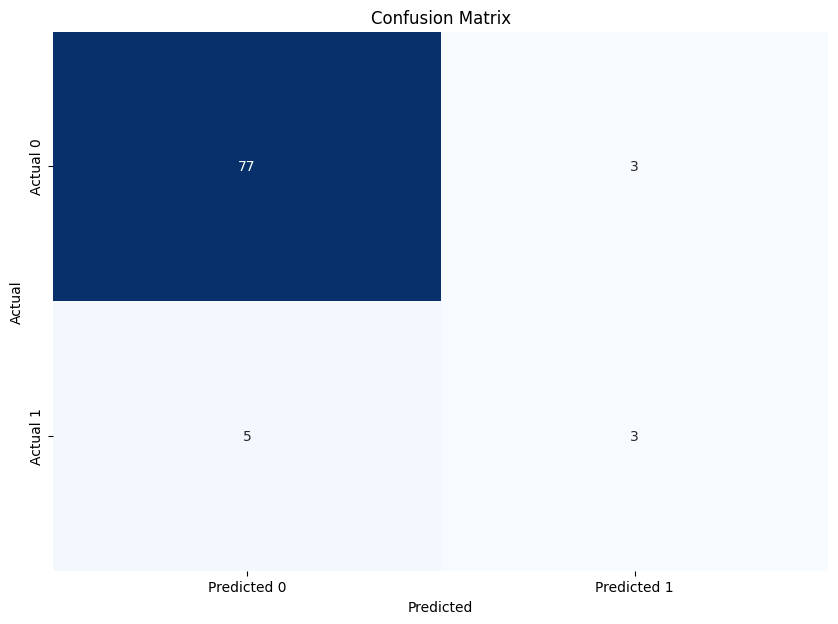

In [11]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from datetime import datetime
import torch

# Parameters
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'
save_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/03.Local_Inference_Eval_Files'
file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# Model parameters
max_events = 40  # Set your actual max_events
input_length = 30  # Set your actual input_length
gap = 2  # Set your actual gap
prediction_period = 1  # Set your actual prediction_period

# Other parameters
start_time = '2005-11-08 18:50:00'  # seq 11624
num_tests = 130

# Define the number of records for each test run (input_length + gap + prediction_period)
num_records_per_test = input_length + gap + prediction_period

# Load the test data
X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Load the original parquet file with sequence mapping
input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
original_df = pd.read_parquet(input_file)

# Ensure Seq_Num is integer for proper merging
original_df['Seq_Num'] = original_df['Seq_Num'].astype(int)

# Filter the test dataset based on the specified start time
filtered_df = original_df[(original_df['Train_Test'] == 'Test') & (original_df['time_start'] == start_time)]
if filtered_df.empty:
    start_date = pd.to_datetime(start_time).date()
    same_date_df = original_df[(original_df['Train_Test'] == 'Test') & (pd.to_datetime(original_df['time_start']).dt.date == start_date)]
    if not same_date_df.empty:
        available_times = same_date_df['time_start'].unique().tolist()
        print(f"Error: start_time {start_time} not found in the dataset. Available times on {start_date} are: {available_times}")
    all_times_df = original_df[original_df['Train_Test'] == 'Test']
    all_times_df['time_start'] = pd.to_datetime(all_times_df['time_start'])
    nearest_time = all_times_df.iloc[(all_times_df['time_start'] - pd.to_datetime(start_time)).abs().argsort()[:1]]['time_start'].values[0]
    print(f"Error: start_time {start_time} not found in the dataset. The nearest available time is: {nearest_time}")
    exit()

start_seq_num = int(filtered_df['Seq_Num'].values[0])
max_end_seq_num = int(original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].max())
expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

if expected_end_seq_num > max_end_seq_num:
    max_allowed_runs = (max_end_seq_num - start_seq_num + 1) // num_records_per_test
    print(f"Number of test runs exceeds the maximum allowed ({max_allowed_runs}). Setting num_tests to {max_allowed_runs}.")
    num_tests = max_allowed_runs
    expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

# Calculate the correct start and end sequence numbers for X_test and y_test
start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
end_index_x_test = min(start_index_x_test + num_tests, len(X_test))

# Use the prepare_data_for_model function to process the test data
def prepare_data_for_model(X_test, start_seq_num, num_records_per_test, num_tests, original_df, max_events):
    start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
    end_index_x_test = min(start_index_x_test + num_tests, len(X_test))
    X_test_limited = X_test[start_index_x_test:end_index_x_test]
    X_test_limited = X_test_limited[:, :, 1:max_events + 16]  # Adjust to max_events + 15 other features + 1
    X_test_tensor = torch.tensor(X_test_limited, dtype=torch.float32)
    return X_test_tensor, start_index_x_test, end_index_x_test

X_test_tensor, start_index_x_test, end_index_x_test = prepare_data_for_model(X_test, start_seq_num, num_records_per_test, num_tests, original_df, max_events)

print(f"X_test shape after adjusting columns: {X_test_tensor.shape}")

# Prepare the data for the request
data = {
    'X_test': X_test_tensor.tolist(),
    'input_length': input_length,
    'gap': gap,
    'prediction_period': prediction_period,
    'max_events': max_events
}

# Send a request to the server
response = requests.post('http://0.0.0.0:5000/predict', json=data)

# Print the raw response text for debugging
print("Raw response text:", response.text)

# Attempt to parse the response as JSON
try:
    response_data = response.json()
except ValueError as e:
    print("Failed to parse JSON response:", e)
    response_data = {}

# Verify the response keys
print("Response keys:", response_data.keys())

# Process the response if it's valid
if 'predictions' in response_data:
    predictions = np.array(response_data['predictions']).flatten()

    # Print first 10 predictions and actual labels
    print("First 10 predictions:", predictions[:10])
    print("First 10 actual labels:", y_test[start_index_x_test:end_index_x_test][:10])

    # Create DataFrame for tracking and merging with additional information
    tracking_data = []

    for i in range(num_tests):
        total_seq_start = start_seq_num + i * num_records_per_test
        total_seq_end = total_seq_start + num_records_per_test - 1
        source_seq_start = total_seq_start
        source_seq_end = source_seq_start + input_length - 1
        gap_seq_start = source_seq_end + 1
        gap_seq_end = gap_seq_start + gap - 1
        prediction_seq_start = total_seq_end - prediction_period + 1
        prediction_seq_end = total_seq_end
        
        tracking_data.append([
            total_seq_start, total_seq_end, source_seq_start, source_seq_end,
            gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end,
            predictions[i], y_test[start_index_x_test + i],
            str(original_df[original_df['Seq_Num'] == source_seq_start]['time_start'].values[0])
        ])

    tracking_df = pd.DataFrame(tracking_data, columns=[
        "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
        "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
        "Predicted", "Actual", "time_start"
    ])

    # Display the first 30 columns of the new DataFrame
    pd.set_option('display.max_columns', 50)
    print("\nEnhanced Results:")
    print(tracking_df.head())

    # Define the timestamp
    timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

    # Save the consolidated DataFrame to the specified location
    final_file = f"{save_dir}/03B.{timestamp}_agent1_non_overlap_model2_consl.csv"
    tracking_df.to_csv(final_file, index=False)

    print(f"Final file with consolidated columns saved to: {final_file}")

    # Calculate metrics
    conf_matrix = confusion_matrix(y_test[start_index_x_test:end_index_x_test], predictions, labels=[0, 1])
    precision = precision_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
    recall = recall_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
    accuracy = accuracy_score(y_test[start_index_x_test:end_index_x_test], predictions)
    f1 = f1_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)

    # Check if the confusion matrix has the expected shape
    if conf_matrix.size == 4:
        tn, fp, fn, tp = conf_matrix.ravel()
    else:
        tn = conf_matrix[0, 0] if conf_matrix.shape[0] > 0 else 0
        fp = conf_matrix[0, 1] if conf_matrix.shape[1] > 1 else 0
        fn = conf_matrix[1, 0] if conf_matrix.shape[0] > 1 else 0
        tp = conf_matrix[1, 1] if conf_matrix.shape[1] > 1 else 0

    # Create a DataFrame for metrics
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'],
        'Value': [accuracy, precision, recall, f1, tp, fp, tn, fn]
    })

    # Print metrics DataFrame
    print("\nMetrics:")
    print(metrics_df)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print("No predictions found in the response.")


___
# <font color = red> Agent 2 Inference: SECONDARY --> DONE
## Use Mapping Info to explain the events used in the inference

### <font color = grey> This agent will then work with Agent 1 who specilizes in initial inference

In [ ]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from datetime import datetime

# Parameters
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'
save_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/03.Local_Inference_Eval_Files'
file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# Load the test data
X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Drop the first column of X_test
X_test = X_test[:, :, 1:]

print(f"X_test shape after dropping the first column: {X_test.shape}")

# Define start time and number of test runs
start_time = '2005-11-08 18:50:00'  # seq 11624
num_tests = 130

# Load the original parquet file with sequence mapping
input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
original_df = pd.read_parquet(input_file)

# Ensure Seq_Num is integer for proper merging
original_df['Seq_Num'] = original_df['Seq_Num'].astype(int)

# Filter the test dataset based on the specified start time
start_seq_num = original_df[(original_df['Train_Test'] == 'Test') & (original_df['time_start'] == start_time)]['Seq_Num'].values[0]
print(f"Calculated start seq_num: {start_seq_num}")

# Define the number of records for each test run (30 source + 2 gap + 1 prediction period = 33 records)
num_records_per_test = 33

# Calculate the maximum end seq_num based on the dataset
max_end_seq_num = original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].max()
print(f"Max end seq_num: {max_end_seq_num}")

# Calculate expected end seq_num based on user input
expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1
print(f"Expected end seq_num based on user input: {expected_end_seq_num}")

# Check if the user-specified number of runs exceeds the maximum allowed runs
if expected_end_seq_num > max_end_seq_num:
    max_allowed_runs = (max_end_seq_num - start_seq_num + 1) // num_records_per_test
    print(f"Number of test runs exceeds the maximum allowed ({max_allowed_runs}). Setting num_tests to {max_allowed_runs}.")
    num_tests = max_allowed_runs
    expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

# Calculate the correct start and end sequence numbers for X_test and y_test
start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
end_index_x_test = start_index_x_test + num_tests

# Ensure the end sequence number does not exceed the length of the test data
if end_index_x_test > len(X_test):
    end_index_x_test = len(X_test)

# Print the sequence numbers for debugging
print(f"Start seq_num for X_test: {start_index_x_test}")
print(f"End seq_num for X_test: {end_index_x_test}")

# Prepare the data for the specified number of test runs
X_test_limited = X_test[start_index_x_test:end_index_x_test]
y_test_limited = y_test[start_index_x_test:end_index_x_test]

# Print the shape and sample of the limited test data for debugging
print(f"X_test_limited shape: {X_test_limited.shape}")
print(f"X_test_limited sample: {X_test_limited[:1]}")

# Prepare the data for the request
data = {'X_test': X_test_limited.tolist()}

# Send a request to the server
response = requests.post('http://0.0.0.0:5000/predict', json=data)

# Print the raw response text for debugging
print("Raw response text:", response.text)

# Attempt to parse the response as JSON
try:
    response_data = response.json()
except ValueError as e:
    print("Failed to parse JSON response:", e)
    response_data = {}

# Verify the response keys
print("Response keys:", response_data.keys())

# Process the response if it's valid
if 'predictions' in response_data:
    predictions = np.array(response_data['predictions']).flatten()

    # Print first 10 predictions and actual labels
    print("First 10 predictions:", predictions[:10])
    print("First 10 actual labels:", y_test_limited[:10])

    # Create DataFrame for tracking and merging with additional information
    tracking_data = []

    for i in range(num_tests):
        total_seq_start = start_seq_num + i * num_records_per_test
        total_seq_end = total_seq_start + num_records_per_test - 1
        source_seq_start = total_seq_start
        source_seq_end = source_seq_start + 30 - 1
        gap_seq_start = source_seq_end + 1
        gap_seq_end = gap_seq_start + 1
        prediction_seq_start = total_seq_end - 1
        prediction_seq_end = total_seq_end
        
        tracking_data.append([
            total_seq_start, total_seq_end, source_seq_start, source_seq_end,
            gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end,
            predictions[i],  # Corrected to take the i-th prediction
            y_test_limited[i]  # Corresponding actual label
        ])

    tracking_df = pd.DataFrame(tracking_data, columns=[
        "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
        "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
        "Predicted", "Actual"
    ])

    # Convert Source_Seq_Start to integer for proper merging
    tracking_df['Source_Seq_Start'] = tracking_df['Source_Seq_Start'].astype(int)

    # Load the master tracking file
    master_tracking_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"
    master_tracking_df = pd.read_parquet(master_tracking_file)

    # Merge with original data to get necessary columns
    merged_df = tracking_df.merge(master_tracking_df, left_on='Source_Seq_Start', right_on='Seq_Num', how='left')

    # Retain only necessary columns
    columns_to_keep = [
        "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
        "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
        "Predicted", "Actual", "Seq_Num", "Train_Test", "time_start", "time_start_int",
        "Class", "unique_events", "most_frequent_event", "transitions", "entropy",
        "hour_of_day", "day_of_week", "event_count", "top_event_frequency",
        "prev_event_count", "transition_rate", "high_transition_rate", "prev_entropy",
        "entropy_change", "rolling_event_count", "rolling_unique_event_count"
    ]

    filtered_df = merged_df[columns_to_keep]

    # Consolidate the most frequent and least frequent events
    def consolidate_events(df, start_col, end_col, col_name):
        consolidated = []
        for i, row in df.iterrows():
            seen_events = set()
            events = []
            for seq_num in range(row[start_col], row[end_col] + 1):
                event_list = master_tracking_df[master_tracking_df['Seq_Num'] == seq_num][col_name].tolist()
                for event in event_list:
                    for e in event.split(', '):
                        if e not in seen_events:
                            seen_events.add(e)
                            events.append(e)
            consolidated.append(', '.join(events))
        return consolidated

    filtered_df['runtime_most_frequent_consl'] = consolidate_events(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_consl')
    filtered_df['runtime_least_frequent_consl'] = consolidate_events(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'least_frequent_consl')

    # Display the head and tail of the final dataframe
    display(filtered_df.head())
    # display(filtered_df.tail())

    # Define the timestamp
    timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

    # Save the consolidated DataFrame to the specified location
    final_file = f"{save_dir}/03B.{timestamp}_agent2_non_overlap_model2_consl.csv"
    filtered_df.to_csv(final_file, index=False)

    print(f"Final file with consolidated columns saved to: {final_file}")

    # Calculate metrics
    conf_matrix = confusion_matrix(y_test_limited, predictions, labels=[0, 1])
    precision = precision_score(y_test_limited, predictions, zero_division=0)
    recall = recall_score(y_test_limited, predictions, zero_division=0)
    accuracy = accuracy_score(y_test_limited, predictions)
    f1 = f1_score(y_test_limited, predictions, zero_division=0)

    # Check if the confusion matrix has the expected shape
    if conf_matrix.size == 4:
        tn, fp, fn, tp = conf_matrix.ravel()
    else:
        # Handle cases with fewer than two classes in the confusion matrix
        tn = conf_matrix[0, 0] if conf_matrix.shape[0] > 0 else 0
        fp = conf_matrix[0, 1] if conf_matrix.shape[1] > 1 else 0
        fn = conf_matrix[1, 0] if conf_matrix.shape[0] > 1 else 0
        tp = conf_matrix[1, 1] if conf_matrix.shape[1] > 1 else 0

    # Create a DataFrame for metrics
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'],
        'Value': [accuracy, precision, recall, f1, tp, fp, tn, fn]
    })

    # Print metrics DataFrame
    print("\nMetrics:")
    print(metrics_df)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print("No predictions found in the response.")


___
# <font color = red> Agent 3 Inference: TERTIARY --> DONE
## Map EventID integers to Template Text and add 2 new columns for tacking

### <font color = grey> This agent will then work with Agents 1 & 2 as needed

In [ ]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from datetime import datetime
import re

# Parameters
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'
save_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/03.Local_Inference_Eval_Files'
file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# Load the test data
X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Drop the first column of X_test
X_test = X_test[:, :, 1:]

print(f"X_test shape after dropping the first column: {X_test.shape}")

# Define start time and number of test runs
start_time = '2005-11-08 18:50:00'  # seq 11624
num_tests = 130

# Load the original parquet file with sequence mapping
input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
original_df = pd.read_parquet(input_file)

# Ensure Seq_Num is integer for proper merging
original_df['Seq_Num'] = original_df['Seq_Num'].astype(int)

# Filter the test dataset based on the specified start time
start_seq_num = original_df[(original_df['Train_Test'] == 'Test') & (original_df['time_start'] == start_time)]['Seq_Num'].values[0]
print(f"Calculated start seq_num: {start_seq_num}")

# Define the number of records for each test run (30 source + 2 gap + 1 prediction period = 33 records)
num_records_per_test = 33

# Calculate the maximum end seq_num based on the dataset
max_end_seq_num = original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].max()
print(f"Max end seq_num: {max_end_seq_num}")

# Calculate expected end seq_num based on user input
expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1
print(f"Expected end seq_num based on user input: {expected_end_seq_num}")

# Check if the user-specified number of runs exceeds the maximum allowed runs
if expected_end_seq_num > max_end_seq_num:
    max_allowed_runs = (max_end_seq_num - start_seq_num + 1) // num_records_per_test
    print(f"Number of test runs exceeds the maximum allowed ({max_allowed_runs}). Setting num_tests to {max_allowed_runs}.")
    num_tests = max_allowed_runs
    expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

# Calculate the correct start and end sequence numbers for X_test and y_test
start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
end_index_x_test = start_index_x_test + num_tests

# Ensure the end sequence number does not exceed the length of the test data
if end_index_x_test > len(X_test):
    end_index_x_test = len(X_test)

# Print the sequence numbers for debugging
print(f"Start seq_num for X_test: {start_index_x_test}")
print(f"End seq_num for X_test: {end_index_x_test}")

# Prepare the data for the specified number of test runs
X_test_limited = X_test[start_index_x_test:end_index_x_test]
y_test_limited = y_test[start_index_x_test:end_index_x_test]

# Print the shape and sample of the limited test data for debugging
print(f"X_test_limited shape: {X_test_limited.shape}")
print(f"X_test_limited sample: {X_test_limited[:1]}")

# Prepare the data for the request
data = {'X_test': X_test_limited.tolist()}

# Send a request to the server
response = requests.post('http://0.0.0.0:5000/predict', json=data)

# Print the raw response text for debugging
print("Raw response text:", response.text)

# Attempt to parse the response as JSON
try:
    response_data = response.json()
except ValueError as e:
    print("Failed to parse JSON response:", e)
    response_data = {}

# Verify the response keys
print("Response keys:", response_data.keys())

# Process the response if it's valid
if 'predictions' in response_data:
    predictions = np.array(response_data['predictions']).flatten()

    # Print first 10 predictions and actual labels
    print("First 10 predictions:", predictions[:10])
    print("First 10 actual labels:", y_test_limited[:10])

    # Create DataFrame for tracking and merging with additional information
    tracking_data = []

    for i in range(num_tests):
        total_seq_start = start_seq_num + i * num_records_per_test
        total_seq_end = total_seq_start + num_records_per_test - 1
        source_seq_start = total_seq_start
        source_seq_end = source_seq_start + 30 - 1
        gap_seq_start = source_seq_end + 1
        gap_seq_end = gap_seq_start + 1
        prediction_seq_start = total_seq_end - 1
        prediction_seq_end = total_seq_end
        
        tracking_data.append([
            total_seq_start, total_seq_end, source_seq_start, source_seq_end,
            gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end,
            predictions[i],  # Corrected to take the i-th prediction
            y_test_limited[i]  # Corresponding actual label
        ])

    tracking_df = pd.DataFrame(tracking_data, columns=[
        "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
        "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
        "Predicted", "Actual"
    ])

    # Convert Source_Seq_Start to integer for proper merging
    tracking_df['Source_Seq_Start'] = tracking_df['Source_Seq_Start'].astype(int)

    # Load the master tracking file
    master_tracking_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"
    master_tracking_df = pd.read_parquet(master_tracking_file)

    # Merge with original data to get necessary columns
    merged_df = tracking_df.merge(master_tracking_df, left_on='Source_Seq_Start', right_on='Seq_Num', how='left')

    # Retain only necessary columns
    columns_to_keep = [
        "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
        "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
        "Predicted", "Actual", "Seq_Num", "Train_Test", "time_start", "time_start_int",
        "Class", "unique_events", "most_frequent_event", "transitions", "entropy",
        "hour_of_day", "day_of_week", "event_count", "top_event_frequency",
        "prev_event_count", "transition_rate", "high_transition_rate", "prev_entropy",
        "entropy_change", "rolling_event_count", "rolling_unique_event_count"
    ]

    filtered_df = merged_df[columns_to_keep]

    # Load event ID to template mapping file
    eventid_encoding_file = f"{data_dir}/08.20240716031626_event_ID_int_template_mapping.csv"
    eventid_encoding_df = pd.read_csv(eventid_encoding_file)

    # Create a dictionary for quick lookup
    eventid_to_template = dict(zip(eventid_encoding_df['EncodedValue'], eventid_encoding_df['EventTemplate']))

    # Function to consolidate events and map to templates
    def clean_text(text):
        # Remove unnecessary characters like <*>, <, and >
        text = re.sub(r'<\*?>', '', text)
        text = text.replace('<', '').replace('>', '')
        return text

    def consolidate_events_to_text(df, start_col, end_col, col_name):
        consolidated = []
        for i, row in df.iterrows():
            seen_events = set()
            events = []
            for seq_num in range(row[start_col], row[end_col] + 1):
                event_list = master_tracking_df[master_tracking_df['Seq_Num'] == seq_num][col_name].astype(str).tolist()
                for event in event_list:
                    for e in event.split(', '):
                        if e not in seen_events:
                            seen_events.add(e)
                            if int(e) in eventid_to_template:
                                cleaned_text = clean_text(eventid_to_template[int(e)])
                                events.append(f'"{cleaned_text}"')
                            else:
                                events.append('"Unknown"')
            consolidated.append(', '.join(events))
        return consolidated

    # Add the new columns
    filtered_df['runtime_most_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event')
    filtered_df['runtime_least_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event')

    # Display the head and tail of the final dataframe
    display(filtered_df.head())
    # display(filtered_df.tail())

    # Define the timestamp
    timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

    # Save the consolidated DataFrame to the specified location
    final_file = f"{save_dir}/03B.{timestamp}_agent3_non_overlap_model2_consl.csv"
    filtered_df.to_csv(final_file, index=False)

    print(f"Final file with consolidated columns saved to: {final_file}")

    # Calculate metrics
    conf_matrix = confusion_matrix(y_test_limited, predictions, labels=[0, 1])
    precision = precision_score(y_test_limited, predictions, zero_division=0)
    recall = recall_score(y_test_limited, predictions, zero_division=0)
    accuracy = accuracy_score(y_test_limited, predictions)
    f1 = f1_score(y_test_limited, predictions, zero_division=0)

    # Check if the confusion matrix has the expected shape
    if conf_matrix.size == 4:
        tn, fp, fn, tp = conf_matrix.ravel()
    else:
        # Handle cases with fewer than two classes in the confusion matrix
        tn = conf_matrix[0, 0] if conf_matrix.shape[0] > 0 else 0
        fp = conf_matrix[0, 1] if conf_matrix.shape[1] > 1 else 0
        fn = conf_matrix[1, 0] if conf_matrix.shape[0] > 1 else 0
        tp = conf_matrix[1, 1] if conf_matrix.shape[1] > 1 else 0

    # Create a DataFrame for metrics
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'],
        'Value': [accuracy, precision, recall, f1, tp, fp, tn, fn]
    })

    # Print metrics DataFrame
    print("\nMetrics:")
    print(metrics_df)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print("No predictions found in the response.")
